In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

In [4]:
df = pd.read_csv('D:\\CDAC\\Github\\Machine_Learning_Tutorials\\DBScan\\CC_GENERAL.csv')

In [5]:
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
df.shape

(8950, 18)

In [10]:
df['MINIMUM_PAYMENTS'].unique()

array([ 139.509787, 1072.340217,  627.284787, ...,   82.418369,
         55.755628,   88.288956])

In [25]:
df['MINIMUM_PAYMENTS'].value_counts()

299.351881    2
342.286490    1
184.464721    1
276.486072    1
309.140865    1
             ..
181.773223    1
711.894455    1
256.522546    1
127.799107    1
88.288956     1
Name: MINIMUM_PAYMENTS, Length: 8636, dtype: int64

In [15]:
X = df.drop('CUST_ID',axis=1)

In [16]:
X.fillna(0,inplace = True)

In [17]:
X.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)
X_normalized.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.312186,-0.106381,-0.181215,-0.152229,-0.148878,-0.199079,-0.343960,-0.289442,-0.301662,-0.288029,-0.203039,-0.218078,-0.409521,-0.225604,-0.126799,-0.224142,0.153826
1,0.219903,0.037535,-0.131209,-0.099739,-0.127024,0.728094,-0.341401,-0.189641,-0.256239,0.160385,0.030758,-0.165368,0.192451,0.228756,0.028514,0.065451,0.100786
2,0.126694,0.146797,-0.030507,0.030853,-0.128803,-0.132262,0.359806,0.757513,-0.259827,-0.191358,-0.134893,-0.030890,0.234081,-0.108750,-0.025073,-0.148913,0.102197
3,0.020362,-0.421735,0.096235,0.226507,-0.188515,-0.152882,-0.420562,-0.165599,-0.380282,-0.107372,-0.136659,-0.228736,0.342599,-0.248279,-0.148064,-0.217948,0.149575
4,-0.151696,0.219054,-0.195368,-0.146841,-0.192202,-0.197364,-0.428788,-0.168838,-0.387720,-0.285548,-0.201290,-0.233210,-0.382754,-0.154060,-0.106650,-0.222211,0.152501


In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components =2)
X_principal=pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1','P2']
print(X_principal.head())

         P1        P2
0 -0.490758 -0.679041
1 -0.518463  0.545356
2  0.330940  0.269072
3 -0.475764 -0.112028
4 -0.564121 -0.480475


In [22]:
from sklearn.cluster import DBSCAN

db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(X_principal)
labels = db_default.labels_
np.unique(labels)

array([-1,  0,  1], dtype=int64)

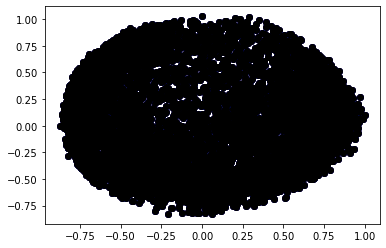

In [24]:
colours = {}
colours[0]='r'
colours[1]='g'
#colours[2]='b'
colours[-1]='k'

r=plt.scatter(X_principal['P1'],X_principal['P2'],color='r')
g=plt.scatter(X_principal['P1'],X_principal['P2'],color='g')
b=plt.scatter(X_principal['P1'],X_principal['P2'],color='b')
k=plt.scatter(X_principal['P1'],X_principal['P2'],color='k')
plt.show()

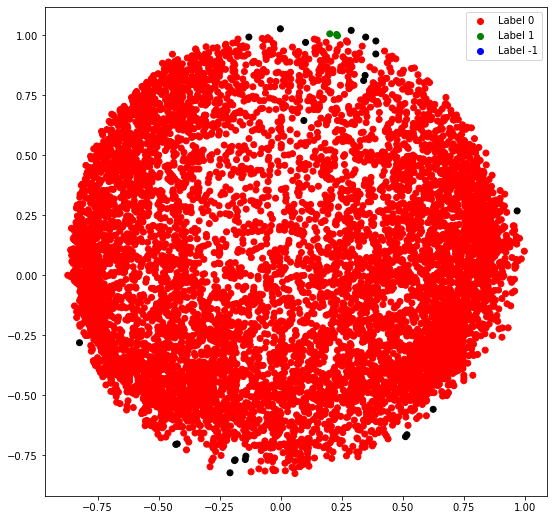

In [26]:
cvec =[colours[label] for label in labels]
plt.figure(figsize=(9,9))
plt.scatter(X_principal['P1'],X_principal['P2'], c=cvec)
plt.legend((r,g,b,k),('Label 0','Label 1','Label -1'))

plt.show()